In [12]:
import seaborn as sns
import os
import pickle
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt #repeat?
import seaborn as sns #repeat?
import matplotlib.gridspec as gridspec
import pandas as pd 
from scipy.stats import ttest_rel
import numpy as np
from sklearn import metrics
from analysis import *
%matplotlib inline 
import math

In [2]:
# load data
sub_data = halfsies(mass_data('../../data'))
pres = mass_df(halfsies(sub_data), typ='pres')
rec = mass_df(halfsies(sub_data), typ='rec')

In [3]:
# add subject numbers
subs = [[x]*80 for x in range(len(sub_data))]
flat_subs = [val for sublist in subs for val in sublist]
pres['subject'] = pd.Series(flat_subs)

# organize RT's
pres['is_cued_RT'] = pres.apply(lambda row: pr(row),axis=1)  
pres['is_cued_RT'] = pres.apply(lambda row: pr(row),axis=1)  
pres = arrange_RTs(pres,sub_data)
pres['is_valid'] = pres.apply(lambda row: is_valid(row),axis=1)

/Users/eowynpak/Documents/attention-memory-task/code/analysis/analysis.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pres1['RT'] = ser1
/Users/eowynpak/Documents/attention-memory-task/code/analysis/analysis.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pres2['RT'] = ser2


In [4]:
pres.head()

,cue_tuples,cued,uncued,subject,is_cued_RT,RT,is_valid
0,"(cue_R, L, 0)",00559940519fa_sunacjkmnpawfzbyvae.jpg,00953960627fa_sunatstrpjxhvtbaczf.jpg,0,1,0.699523,valid
1,"(cue_R, L, 0)",00854940307fa_sunaiwduelojtwaqeyh.jpg,01002960627fb_sunbwaafjdebjzttuvq.jpg,0,1,0.776675,valid
2,"(cue_R, L, 0)",00210940128fb_sunabanoxjtqxamkucc.jpg,00675941121fa_sunadoxcchtmsxewsau.jpg,0,1,0.320209,valid
3,"(cue_R, L, 0)",00314940422fa_sunabwmcbaxwioksdgw.jpg,00483940519fa_sunabyvpwkgsjtijdwj.jpg,0,1,0.347829,valid
4,"(cue_R, L, 0)",00532960627fa_sunaccdtpgenvcbcbcf.jpg,00818940307fa_sunahpblecxtmuzkmxb.jpg,0,1,0.412960,valid


In [36]:
rec.head()

,familiarity,images,cued_cat,location,cat,category,attention level,report familiar
0,1.0,sunatstrpjxhvtbaczf.jpg,L,unattended,L,attended,category,no
1,3.0,sunaiwduelojtwaqeyh.jpg,L,attended,L,attended,both,yes
2,4.0,sunabwmcbaxwioksdgw.jpg,L,attended,L,attended,both,yes
3,1.0,sunacjkmnpawfzbyvae.jpg,L,attended,L,attended,both,no
4,4.0,00082931230fa.jpg,L,attended,F,unattended,side,yes


In [37]:
means = pd.DataFrame(pres.groupby(['subject', 'is_valid'])['RT'].mean())


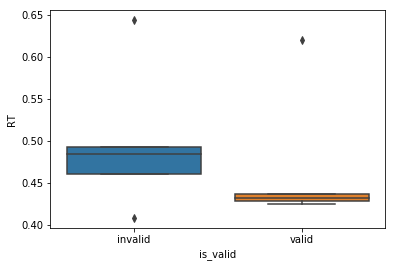

In [38]:
means = means.reset_index()
sns.boxplot(x = "is_valid", y = "RT", data = means)
plt.savefig('../../figs/box_means.pdf')

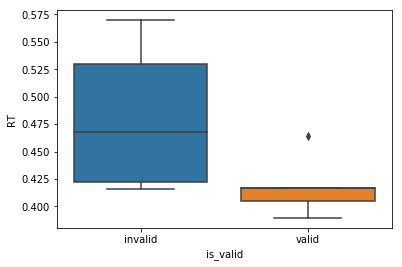

In [39]:
medians = pd.DataFrame(pres.groupby(['subject', 'is_valid'])['RT'].median())
medians = medians.reset_index()
sns.boxplot(x = "is_valid", y = "RT", data = medians)
plt.savefig('../../figs/box_medians.pdf')

In [40]:
ttest_rel(medians[medians['is_valid']=='valid']['RT'],[medians['is_valid']=='invalid']['RT'])

TypeError: list indices must be integers or slices, not str

In [41]:
ttest_rel(np.array(medians[medians['is_valid']=='valid']['RT']), np.array([medians['is_valid']=='invalid']['RT']))

TypeError: list indices must be integers or slices, not str

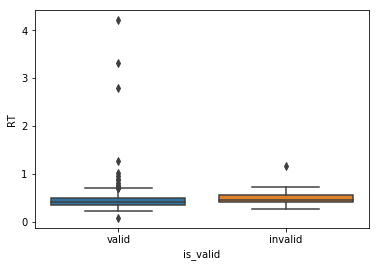

In [42]:
sns.boxplot(x='is_valid', y='RT', data=pres)
##plt.ylim([0,2])
plt.savefig('../../figs/box.pdf')
#ttest_rel(pres[pres['is_valid']=='valid']['RT'],pres[pres['is_valid']=='invalid']['RT'])

# ANOVA

In [43]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova = ols('familiarity ~ C(category) + C(location)', data=rec).fit() #Specify C for Categorical
print(sm.stats.anova_lm(anova, typ=2))

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                  sum_sq      df          F        PR(>F)
C(category)    95.279178     2.0  54.428226  1.454271e-23
C(location)    86.812625     2.0  49.591708  1.348398e-21
Residual     1343.544960  1535.0        NaN           NaN


# Plot

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


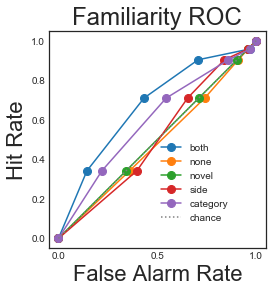

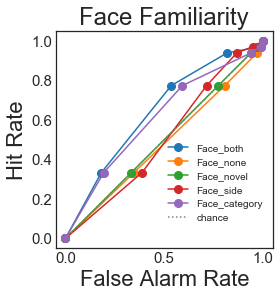

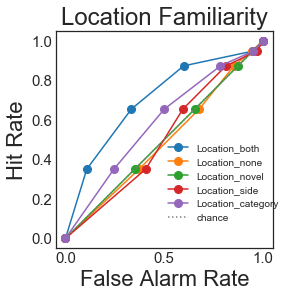

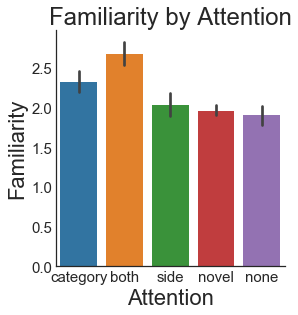

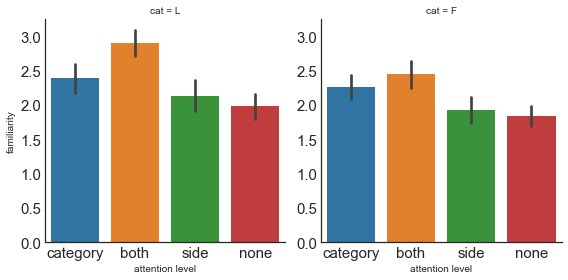

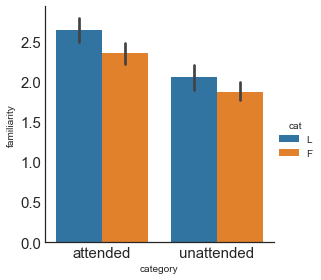

In [44]:
sns.set_style('white')
rec2 = rec.replace('novel', np.nan)

# ROC 1 ##
data = ROC_data(rec)

for key in data.keys():
    plt.plot(data[key], data['novel'], '-o', label=key, markersize=8)

plt.plot([0, 0.5, 1], [0, 0.5, 1], ':',color = 'gray', label='chance')
plt.axes().set_aspect('equal')
plt.legend(loc = (.5, .1))
plt.title('Familiarity ROC', size=24)

labels = [1, 2, 3, 4]

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.ylabel('Hit Rate', size=22)
plt.xlabel('False Alarm Rate', size=22)
plt.savefig('../../figs/ROC_full.pdf')
plt.show()




# ROC 2 ##

data2 = ROC_data(rec, category= True)
for x in ['Face','Location']:

    for key in [y for y in data2.keys() if y[0]==x[0]]:
        plt.plot(data2[key], data2[x+'_novel'], '-o', label=key, markersize=8)

    plt.plot([0, 0.5, 1], [0, 0.5, 1], ':',color = 'gray', label='chance')
    plt.axes().set_aspect('equal')
    plt.legend(loc = (.5, .1))
    plt.title(x+' Familiarity', size=24)

    labels = [1, 2, 3, 4]

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15

    plt.ylabel('Hit Rate', size=22)
    plt.xlabel('False Alarm Rate', size=22)

    save_str = '../../figs/ROC_full_'+x+'.pdf'
    plt.savefig(save_str)
    plt.show()

    
    
    
g = sns.factorplot(x='attention level', y="familiarity", data=rec, kind='bar')#, kind = 'bar', hue='location', col='cat')#, col='cat')
#plt.legend(loc = (.5, .1))
plt.title('Familiarity by Attention', size=24)

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.ylabel('Familiarity', size=22)
plt.xlabel('Attention', size=22)
plt.savefig('../../figs/bar.pdf')
plt.show()



g = sns.factorplot(x='attention level', y="familiarity", data=rec2, kind='bar', col='cat')#, kind = 'bar', hue='location', col='cat')#, col='cat')


plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15


plt.savefig('../../figs/bar_cat.pdf')
plt.show()


g = sns.factorplot(x='category', y="familiarity", data=rec2, kind='bar', hue='cat')#, kind = 'bar', hue='location', col='cat')#, col='cat')

